In [ ]:
#Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
#Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
#Step-3: Divide the S into subsets that contains possible values for the best attributes.
#Step-4: Generate the decision tree node, which contains the best attribute.
#Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. 
#Continue this process until a stage is reached where you cannot further classify the nodes and 
#called the final node as a leaf node.


In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import os

In [8]:
df=pd.read_csv("E:\DATASET/daily_weather.csv")
df.head(10)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


In [9]:
df.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [10]:
df.shape

(1095, 11)

<AxesSubplot:>

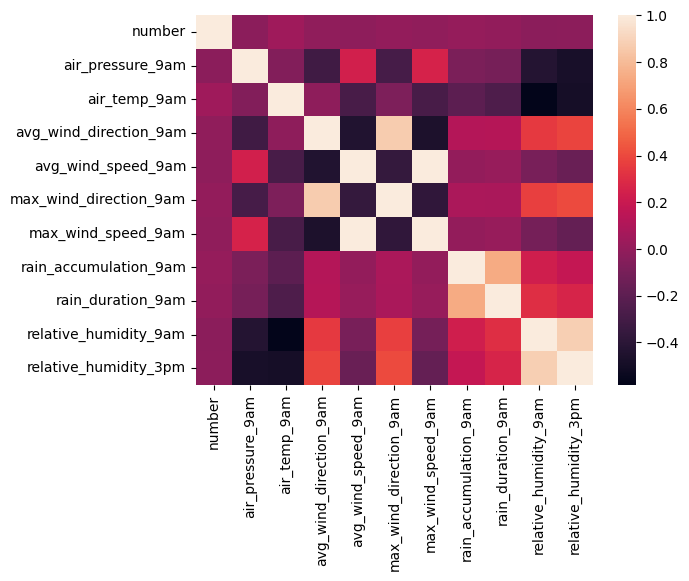

In [31]:
import seaborn as sns
sns.heatmap(df.corr())


In [11]:
df[df.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


In [12]:
df=df.dropna()
df.shape

(1064, 11)

In [13]:
clean_df=df.copy()
clean_df['high humadity label']=(clean_df['relative_humidity_3pm']>28)*1
clean_df['high humadity label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high humadity label, dtype: int32

In [14]:
#target variable
y=clean_df[['high humadity label']].copy()
y.head()

,high humadity label
0,1
1,0
2,0
3,0
4,1


In [15]:
df.columns
features=['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       ]

In [16]:
x=clean_df[features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [17]:
y.columns

Index(['high humadity label'], dtype='object')

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=324)

In [19]:
humidity_classifier=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [20]:
y_predicted=humidity_classifier.predict(x_test)
y_predicted

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 88.92%


In [22]:
confusion_matrix(y_test,y_predicted)

array([[166,  14],
       [ 25, 147]], dtype=int64)

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [27]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

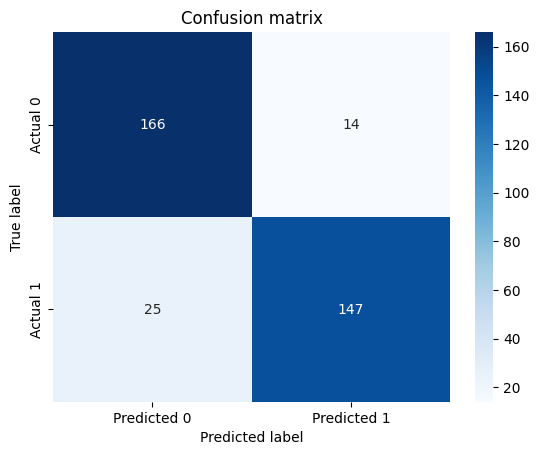

In [30]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()
